In [1]:
import pandas as pd

In [2]:
df_pdbbind = pd.read_parquet('data/pdbbind.parquet')
df_pdbbind = df_pdbbind[['seq','smiles','affinity_uM']]

In [3]:
df_pdbbind.head()

seq  \
0  MTVPDRSEIAGKWYVVALASNTEFFLREKDKMKMAMARISFLGEDE...   
1  APQTITELCSEYRNTQIYTINDKILSYTESMAGKREMVIITFKSGE...   
2  VETFAFQAEIAQLMSLIINTFYSNKEIFLRELISNSSDALDKIRYE...   
3  AAPFDKSKNVAQSIDQLIGQTPALYLNKLNNTKAKVVLKMECENPM...   
4  YITFRSFTAVLIAFFLTLVLSPSFINRLRKIQRKKYTPTMGGIVIL...   

                                              smiles  affinity_uM  
0                          CCCCCCCCCCCCCCCCCCCC(=O)O        0.026  
1  OC[C@H]1O[C@H](Oc2cccc(c2)N(=O)=O)[C@@H]([C@H]...      500.000  
2  COc1ccc(cc1)c1c(onc1c1cc(C(C)C)c(cc1O)O)NC(=O)...        0.023  
3  OC[C@@H](C(=O)N[C@@H]([C@H](CC)C)C(=O)O)NC(=O)...        6.430  
4  CO[C@@H]1[C@H](O[C@H]([C@@H]1O)n1ccc(=O)[nH]c1...        0.185

In [4]:
from rdkit import Chem
from rdkit.Chem import MACCSkeys
import numpy as np

def get_maccs(smi):
    try:
        mol = Chem.MolFromSmiles(smi)
        arr = np.packbits([0 if c=='0' else 1 for c in MACCSkeys.GenMACCSKeys(mol).ToBitString()])
        return np.pad(arr,(0,3)).view(np.uint32)
    except Exception:
        pass

In [5]:
df_bindingdb = pd.read_parquet('data/bindingdb.parquet')
df_bindingdb = df_bindingdb[['seq','Ligand SMILES','affinity_uM']].rename(columns={'Ligand SMILES': 'smiles'})

In [6]:
df_bindingdb.head()

seq  \
0  PQITLWQRPLVTIKIGGQLKEALLDTGADDTVLEEMSLPGRWKPKM...   
1  PQITLWQRPLVTIKIGGQLKEALLDTGADDTVLEEMSLPGRWKPKM...   
2  PQITLWQRPLVTIKIGGQLKEALLDTGADDTVLEEMSLPGRWKPKM...   
3  PQITLWQRPLVTIKIGGQLKEALLDTGADDTVLEEMSLPGRWKPKM...   
4  PQITLWQRPLVTIKIGGQLKEALLDTGADDTVLEEMSLPGRWKPKM...   

                                              smiles  affinity_uM  
0      COc1cc2c(Nc3ccc(Br)cc3F)ncnc2cc1OCC1CCN(C)CC1      0.00024  
1  O[C@@H]1[C@@H](O)[C@@H](Cc2ccccc2)N(C\C=C\c2cn...      0.00025  
2  O[C@@H]1[C@@H](O)[C@@H](Cc2ccccc2)N(CC2CC2)C(=...      0.00041  
3  OCCCCCCN1[C@H](Cc2ccccc2)[C@H](O)[C@@H](O)[C@@...      0.00080  
4  OCCCCCN1[C@H](Cc2ccccc2)[C@H](O)[C@@H](O)[C@@H...      0.00099

In [10]:
df_moad = pd.read_parquet('data/moad.parquet')
df_moad = df_moad[['seq','smiles','affinity_uM']]

In [11]:
df_moad

seq  \
0      NYIVPGEYRVAEGEIEINAGREKTTIRVSNTGDRPIQVGSHIHFVE...   
1      NYIVPGEYRVAEGEIEINAGREKTTIRVSNTGDRPIQVGSHIHFVE...   
2      MEGMRRPTPTVYVGRVPIGGAHPIAVQSMTNTPTRDVEATTAQVLE...   
3      MEGMRRPTPTVYVGRVPIGGAHPIAVQSMTNTPTRDVEATTAQVLE...   
4      MTDMSIKFELIDVPIPQGTNVIIGQAHFIKTVEDLYEALVTSVPGV...   
...                                                  ...   
25420  MGSSHHHHHHSSGLVPRGSHMASNPSLIRSESWQVYEGNEANLLDG...   
25421  MGSSHHHHHHSSGLVPRGSHMASNPSLIRSESWQVYEGNEANLLDG...   
25422  MGSSHHHHHHSSGLVPRGSHMASNPSLIRSESWQVYEGNEANLLDG...   
25423  MGSSHHHHHHSSGLVPRGSHMASNPSLIRSESWQVYEGNEANLLDG...   
25424  MGSSHHHHHHSSGLVPRGSHMASNPSLIRSESWQVYEGNEANLLDG...   

                                                  smiles  affinity_uM  
0                                             NP(=O)(N)O     0.000620  
1                                               CC(=O)NO     2.600000  
2                               C#CCCOP(=O)(O)OP(=O)(O)O     0.580000  
3                                C#CCOP(=O)(O)OP(=O)(O)O     0.770000  
4      c1nc(c2c(n1)n(cn2)[C@H]3[C@@H]([C@@H]([C@H](O3...    15.000000  
...                                                  ...          ...  
25420                                               None   127.226463  
25421                                               None   127.226463  
25422                                               None   169.204738  
25423                                               None   169.204738  
25424                                               None   169.204738  

[25425 rows x 3 columns]

In [12]:
df_biolip = pd.read_parquet('data/biolip.parquet')
df_biolip = df_biolip[['seq','smiles','affinity_uM']]

In [13]:
df_biolip

seq  \
38      PYTVVYFPVRGRCAALRMLLADQGQSWKEEVVTVETWQEGSLKASC...   
43      MPPYTVVYFPVRGRCAALRMLLADQGQSWKEEVVTVETWQEGSLKA...   
53      EKKSINECDLKGKKVLIRVDFNVPVKNGKITNDYRIRSALPTLKKV...   
54      MPPYTVVYFPVRGRCAALRMLLADQGQSWKEEVVTVETWQEGSLKA...   
55      MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAKSEL...   
...                                                   ...   
105118  PQITLWQRPLVTIKIGGQLKEALLDTGADDTVLEEMNLPGRWKPKM...   
105119  PQITLWQRPLVTIKIGGQLKEALLDTGADDTVLEEMNLPGRWKPKM...   
105124  SKVVVPAQGKKITLQNGKLNVPENPIIPYIEGDGIGVDVTPAMLKV...   
105133  ANIVGGIEYSINNASLCSVGFSVTRGATKGFVTAGHCGTVNATARI...   
105138  KFPRVKNWELGSITYDTLCAQSQQDGPCTPRRCLGSLVLPRKLQTR...   

                                                   smiles  affinity_uM  
38                CC[C@H](C(=O)c1ccc(c(c1Cl)Cl)OCC(=O)O)C       1.5000  
43      OC(=O)c1cc(/N=N/c2ccc(cc2)S(=O)(=O)Nc2ccccn2)c...      24.0000  
53      O[C@@H]1[C@@H](CO[P@](=O)(O[P@@](=O)(C(CCCC(P(...       6.0000  
54      CCCCCCSC[C@@H](C(=O)NCC(=O)O)NC(=O)CC[C@@H](C(...      10.0000  
55                                               c1ccccc1     175.0000  
...                                                   ...          ...  
105118  O[C@@H]([C@H](Cc1ccccc1)NC(=O)[C@H](C(C)C)NC(=...       0.0045  
105119  O[C@@H]([C@H](Cc1ccccc1)NC(=O)[C@H](C(C)C)NC(=...       0.0045  
105124  O[C@@H]1[C@@H](COP(=O)(O)O)O[C@H]([C@@H]1OP(=O...     125.0000  
105133  CC(C[C@@H](B(O)O)NC(=O)[C@@H]1CCCN1C(=O)[C@@H]...       2.0000  
105138                                       CC[Se]C(=N)N       0.0390  

[13645 rows x 3 columns]

In [14]:
df_all = pd.concat([df_pdbbind,df_bindingdb,df_moad,df_biolip]).reset_index()

In [15]:
len(df_all)

2574545

In [16]:
from pandarallel import pandarallel
pandarallel.initialize()

INFO: Pandarallel will run on 32 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


In [ ]:
df_all['maccs'] = df_all['smiles'].parallel_apply(get_maccs)

In [18]:
df_all.to_parquet('data/all_maccs.parquet')

In [19]:
import numpy as np

In [20]:
df_all = pd.read_parquet('data/all_maccs.parquet')
df_all = df_all.dropna().reset_index(drop=True)

In [21]:
len(df_all)

2568079

In [22]:
maccs = df_all['maccs'].to_numpy()
#df_reindex[df_reindex.duplicated(keep='first')].reset_index()

In [23]:
df_maccs = pd.DataFrame(np.vstack(maccs))

In [24]:
df_maccs.dtypes

0    int64
1    int64
2    int64
3    int64
4    int64
5    int64
dtype: object

In [25]:
df_expand = pd.concat([df_all[['seq','smiles','affinity_uM']],df_maccs],axis=1)

In [26]:
df_expand

seq  \
0        MTVPDRSEIAGKWYVVALASNTEFFLREKDKMKMAMARISFLGEDE...   
1        APQTITELCSEYRNTQIYTINDKILSYTESMAGKREMVIITFKSGE...   
2        VETFAFQAEIAQLMSLIINTFYSNKEIFLRELISNSSDALDKIRYE...   
3        AAPFDKSKNVAQSIDQLIGQTPALYLNKLNNTKAKVVLKMECENPM...   
4        YITFRSFTAVLIAFFLTLVLSPSFINRLRKIQRKKYTPTMGGIVIL...   
...                                                    ...   
2568074  PQITLWQRPLVTIKIGGQLKEALLDTGADDTVLEEMNLPGRWKPKM...   
2568075  PQITLWQRPLVTIKIGGQLKEALLDTGADDTVLEEMNLPGRWKPKM...   
2568076  SKVVVPAQGKKITLQNGKLNVPENPIIPYIEGDGIGVDVTPAMLKV...   
2568077  ANIVGGIEYSINNASLCSVGFSVTRGATKGFVTAGHCGTVNATARI...   
2568078  KFPRVKNWELGSITYDTLCAQSQQDGPCTPRRCLGSLVLPRKLQTR...   

                                                    smiles  affinity_uM  \
0                                CCCCCCCCCCCCCCCCCCCC(=O)O       0.0260   
1        OC[C@H]1O[C@H](Oc2cccc(c2)N(=O)=O)[C@@H]([C@H]...     500.0000   
2        COc1ccc(cc1)c1c(onc1c1cc(C(C)C)c(cc1O)O)NC(=O)...       0.0230   
3        OC[C@@H](C(=O)N[C@@H]([C@H](CC)C)C(=O)O)NC(=O)...       6.4300   
4        CO[C@@H]1[C@H](O[C@H]([C@@H]1O)n1ccc(=O)[nH]c1...       0.1850   
...                                                    ...          ...   
2568074  O[C@@H]([C@H](Cc1ccccc1)NC(=O)[C@H](C(C)C)NC(=...       0.0045   
2568075  O[C@@H]([C@H](Cc1ccccc1)NC(=O)[C@H](C(C)C)NC(=...       0.0045   
2568076  O[C@@H]1[C@@H](COP(=O)(O)O)O[C@H]([C@@H]1OP(=O...     125.0000   
2568077  CC(C[C@@H](B(O)O)NC(=O)[C@@H]1CCCN1C(=O)[C@@H]...       2.0000   
2568078                                       CC[Se]C(=N)N       0.0390   

                  0           1           2           3           4    5  
0                 0           0   805306368   272271360   890245320  136  
1        2147483648  3242590208  1914732547   994116706  3748288829  124  
2            131072  1109655552  2123376961  3477340882  2951175957  252  
3                 0     6685696  2033191680  1345701844  2133187096  220  
4           1048576  1107427332  2109513024  4081492984  4026260436  252  
...             ...         ...         ...         ...         ...  ...  
2568074       65536      393216   964698368   369403648  4284858000  252  
2568075       65536      393216   964698368   369403648  4284858000  252  
2568076    67108864  1115688962  1771869508  4018431718  3744193341  124  
2568077     2097152      137216   958148868  1746307978  2067783280  204  
2568078          16        6144   537396736     2170880  1510015504  192  

[2568079 rows x 9 columns]

In [27]:
df_expand.columns

Index(['seq', 'smiles', 'affinity_uM', 0, 1, 2, 3, 4, 5], dtype='object')

In [28]:
df_reindex = df_expand.set_index([0,1,2,3,4,5,'seq'])

In [29]:
df_reindex.columns

Index(['smiles', 'affinity_uM'], dtype='object')

In [30]:
df_nr = df_reindex[~df_reindex.duplicated(keep='first')].reset_index()
df_nr = df_nr.drop(columns=[0,1,2,3,4,5])

In [31]:
# final sanity checks

In [32]:
df_nr['neg_log10_affinity_M'] = 6-np.log(df_nr['affinity_uM'])/np.log(10)

/ccs/proj/stf006/glaser/conda-envs/dask/lib/python3.9/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [33]:
df_nr

seq  \
0        MTVPDRSEIAGKWYVVALASNTEFFLREKDKMKMAMARISFLGEDE...   
1        APQTITELCSEYRNTQIYTINDKILSYTESMAGKREMVIITFKSGE...   
2        VETFAFQAEIAQLMSLIINTFYSNKEIFLRELISNSSDALDKIRYE...   
3        AAPFDKSKNVAQSIDQLIGQTPALYLNKLNNTKAKVVLKMECENPM...   
4        YITFRSFTAVLIAFFLTLVLSPSFINRLRKIQRKKYTPTMGGIVIL...   
...                                                    ...   
1929143  IVEGSDAEIGMSPWQVMLFRKSPQELLCGASLISDRWVLTAAHCLL...   
1929144  IVEGSDAEIGMSPWQVMLFRKSPQELLCGASLISDRWVLTAAHCLL...   
1929145  PQITLWQRPLVTIKIGGQLKEALLDTGADDTVLEEMNLPGRWKPKM...   
1929146  ANIVGGIEYSINNASLCSVGFSVTRGATKGFVTAGHCGTVNATARI...   
1929147  KFPRVKNWELGSITYDTLCAQSQQDGPCTPRRCLGSLVLPRKLQTR...   

                                                    smiles  affinity_uM  \
0                                CCCCCCCCCCCCCCCCCCCC(=O)O       0.0260   
1        OC[C@H]1O[C@H](Oc2cccc(c2)N(=O)=O)[C@@H]([C@H]...     500.0000   
2        COc1ccc(cc1)c1c(onc1c1cc(C(C)C)c(cc1O)O)NC(=O)...       0.0230   
3        OC[C@@H](C(=O)N[C@@H]([C@H](CC)C)C(=O)O)NC(=O)...       6.4300   
4        CO[C@@H]1[C@H](O[C@H]([C@@H]1O)n1ccc(=O)[nH]c1...       0.1850   
...                                                    ...          ...   
1929143  O=C[C@@H](NC(=O)[C@H](Cc1ccc(cc1)OS(O)(O)O)NC(...       8.0000   
1929144  CC(C[C@@H](C(=O)N1C=CC[C@H]1C(=O)N)NC(=O)[C@@H...       8.0000   
1929145  O[C@@H]([C@H](Cc1ccccc1)NC(=O)[C@H](C(C)C)NC(=...       0.0045   
1929146  CC(C[C@@H](B(O)O)NC(=O)[C@@H]1CCCN1C(=O)[C@@H]...       2.0000   
1929147                                       CC[Se]C(=N)N       0.0390   

         neg_log10_affinity_M  
0                    7.585027  
1                    3.301030  
2                    7.638272  
3                    5.191789  
4                    6.732828  
...                       ...  
1929143              5.096910  
1929144              5.096910  
1929145              8.346787  
1929146              5.698970  
1929147              7.408935  

[1929148 rows x 4 columns]

In [34]:
df = df_nr[np.isfinite(df_nr['neg_log10_affinity_M'])].copy()

In [35]:
from rdkit import Chem
def make_canonical(smi):
    try:
        return Chem.MolToSmiles(Chem.MolFromSmiles(smi))
    except:
        return smi

In [36]:
df['smiles_can'] = df['smiles'].parallel_apply(make_canonical)

In [37]:
df = df[(df['neg_log10_affinity_M']>0) & (df['neg_log10_affinity_M']<15)].reset_index()

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
scaler = StandardScaler()

In [18]:
df['affinity'] = scaler.fit_transform(df['neg_log10_affinity_M'].values.reshape(-1,1))

In [19]:
scaler.mean_, scaler.var_

(array([6.51286529]), array([2.4379995]))

In [21]:
df = df.drop(columns='index')

In [7]:
#df.to_parquet('data/all.parquet')
df = pd.read_parquet('data/all.parquet')

In [22]:
df.columns

Index(['seq', 'smiles', 'affinity_uM', 'neg_log10_affinity_M', 'smiles_can',
       'affinity'],
      dtype='object')

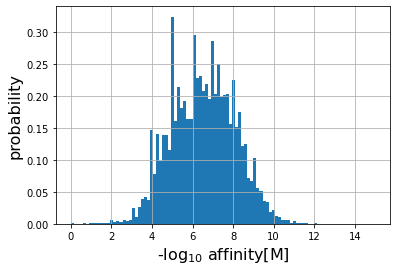

In [23]:
ax = df['neg_log10_affinity_M'].hist(bins=100,density=True)
ax.set_xlabel('-$\log_{10}$ affinity[M]',fontsize=16)
ax.set_ylabel('probability',fontsize=16)
ax.figure.savefig('affinity_neglog10_M.pdf')

In [24]:
len(df)

1927202

In [25]:
scaler.__dict__

{'with_mean': True,
 'with_std': True,
 'copy': True,
 'n_features_in_': 1,
 'n_samples_seen_': 1927202,
 'mean_': array([6.51286529]),
 'var_': array([2.4379995]),
 'scale_': array([1.56140946])}

In [26]:
scaler.__dict__

{'with_mean': True,
 'with_std': True,
 'copy': True,
 'n_features_in_': 1,
 'n_samples_seen_': 1927202,
 'mean_': array([6.51286529]),
 'var_': array([2.4379995]),
 'scale_': array([1.56140946])}

In [27]:
# output the normalization

import json

class NumpyEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, np.ndarray):
            return obj.tolist()
        if isinstance(obj, np.int64):
            return int(obj)
        return json.JSONEncoder.default(self, obj)
    
json.dump(scaler.__dict__,open('data/scaling.json','w'),cls=NumpyEncoder)

**without KRAS**

In [29]:
smiles_sotorasib = 'C=CC(=O)N1CCN(c2nc(=O)n(-c3c(C)ccnc3C(C)C)c3nc(-c4c(O)cccc4F)c(F)cc23)[C@@H](C)C1'
seq_kras_wt = 'MTEYKLVVVGAGGVGKSALTIQLIQNHFVDEYDPTIEDSYRKQVVIDGETCLLDILDTAGQEEYSAMRDQYMRTGEGFLCVFAINNTKSFEDIHHYREQIKRVKDSEDVPMVLVGNKCDLPSRTVDTKQAQDLARSYGIPFIETSAKTRQRVEDAFYTLVREIRQYRLKKISKEEKTPGCVKIKKCIIM'

In [45]:
df_nokras = df[~df.seq.str.startswith(seq_kras_wt[:20])]

In [46]:
len(df_nokras)

1926799

In [47]:
df_nokras.to_parquet('data/all_nokras.parquet')